In [15]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np

In [16]:
df = pd.read_csv('data.csv')
df

,Date,Temp
0,2022-12-15 10:43:17,37.92
1,2022-12-15 10:43:36,37.96
2,2022-12-15 10:43:51,37.97
3,2022-12-15 10:44:06,37.94
4,2022-12-15 10:44:23,37.97
...,...,...
25795,2022-12-27 23:16:37,34.93
25796,2022-12-27 23:17:42,33.95
25797,2022-12-27 23:18:45,33.96
25798,2022-12-27 23:19:50,33.96


In [17]:
df.index = pd.to_datetime(df['Date'], format='%Y-%m-%d %H:%M:%S')
df[:26]

,Date,Temp
Date,,
2022-12-15 10:43:17,2022-12-15 10:43:17,37.92
2022-12-15 10:43:36,2022-12-15 10:43:36,37.96
2022-12-15 10:43:51,2022-12-15 10:43:51,37.97
2022-12-15 10:44:06,2022-12-15 10:44:06,37.94
2022-12-15 10:44:23,2022-12-15 10:44:23,37.97
2022-12-15 10:44:43,2022-12-15 10:44:43,37.98
2022-12-15 10:44:59,2022-12-15 10:44:59,37.97
2022-12-15 10:45:14,2022-12-15 10:45:14,37.99
2022-12-15 10:45:30,2022-12-15 10:45:30,37.99


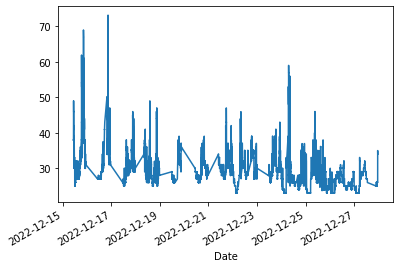

In [18]:
price = df['Temp']
price.plot()

In [19]:
def df_to_X_y(df, window_size):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np) - window_size):
    row = [[a] for a in df_as_np[i : i + 5]] # first 5 predicts the 6th. So on
    X.append(row)
    label = df_as_np[i + 5]
    y.append(label)
  return np.array(X), np.array(y)

In [20]:
WINDOW_SIZE = 5
X, y = df_to_X_y(price, WINDOW_SIZE)
X.shape, y.shape

((25795, 5, 1), (25795,))

In [21]:
X_train, y_train = X[:3500], y[:3500]
X_val, y_val = X[3500:4000], y[3500:4000]
X_test, y_test = X[4000:], y[4000:]
X_train.shape, X_val.shape, X_test.shape

((3500, 5, 1), (500, 5, 1), (21795, 5, 1))

In [22]:
from keras.layers.pooling.max_pooling1d import MaxPooling1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam


model1 = Sequential()
model1.add(InputLayer((5, 1)))
model1.add(Conv1D(2, 3, 1))
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 3, 2)              8         
                                                                 
 lstm_1 (LSTM)               (None, 64)                17152     
                                                                 
 dense_2 (Dense)             (None, 8)                 520       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17,689
Trainable params: 17,689
Non-trainable params: 0
_________________________________________________________________


In [23]:
cp = ModelCheckpoint('model1/', save_best_only=True)

model1.compile(loss=MeanSquaredError(),
               optimizer=Adam(learning_rate=0.0005),
               metrics = [RootMeanSquaredError()])

model1.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=500, callbacks=[cp])


Epoch 1/500
102/110 [==========================>...] - ETA: 0s - loss: 1143.1034 - root_mean_squared_error: 33.8098

110/110 [==============================] - 6s 40ms/step - loss: 1127.3176 - root_mean_squared_error: 33.5756 - val_loss: 863.1219 - val_root_mean_squared_error: 29.3789
Epoch 2/500
108/110 [============================>.] - ETA: 0s - loss: 752.7148 - root_mean_squared_error: 27.4356

110/110 [==============================] - 4s 38ms/step - loss: 749.3161 - root_mean_squared_error: 27.3736 - val_loss: 472.6768 - val_root_mean_squared_error: 21.7411
Epoch 3/500
108/110 [============================>.] - ETA: 0s - loss: 377.2416 - root_mean_squared_error: 19.4227

110/110 [==============================] - 4s 35ms/step - loss: 374.7739 - root_mean_squared_error: 19.3591 - val_loss: 169.4621 - val_root_mean_squared_error: 13.0178
Epoch 4/500
108/110 [============================>.] - ETA: 0s - loss: 168.6127 - root_mean_squared_error: 12.9851

110/110 [==============================] - 4s 35ms/step - loss: 167.8708 - root_mean_squared_error: 12.9565 - val_loss: 53.3346 - val_root_mean_squared_error: 7.3031
Epoch 5/500
108/110 [============================>.] - ETA: 0s - loss: 101.1574 - root_mean_squared_error: 10.0577

110/110 [==============================] - 4s 35ms/step - loss: 101.0876 - root_mean_squared_error: 10.0542 - val_loss: 27.5265 - val_root_mean_squared_error: 5.2466
Epoch 6/500
108/110 [============================>.] - ETA: 0s - loss: 88.3588 - root_mean_squared_error: 9.3999

110/110 [==============================] - 4s 40ms/step - loss: 88.8268 - root_mean_squared_error: 9.4248 - val_loss: 24.9142 - val_root_mean_squared_error: 4.9914
Epoch 7/500
108/110 [============================>.] - ETA: 0s - loss: 87.9177 - root_mean_squared_error: 9.3764

110/110 [==============================] - 4s 35ms/step - loss: 87.4741 - root_mean_squared_error: 9.3528 - val_loss: 24.5079 - val_root_mean_squared_error: 4.9505
Epoch 8/500
 97/110 [=========================>....] - ETA: 0s - loss: 82.1875 - root_mean_squared_error: 9.0657

110/110 [==============================] - 4s 36ms/step - loss: 81.6183 - root_mean_squared_error: 9.0343 - val_loss: 21.0644 - val_root_mean_squared_error: 4.5896
Epoch 9/500
100/110 [==========================>...] - ETA: 0s - loss: 64.0949 - root_mean_squared_error: 8.0059

110/110 [==============================] - 4s 36ms/step - loss: 62.8101 - root_mean_squared_error: 7.9253 - val_loss: 11.0437 - val_root_mean_squared_error: 3.3232
Epoch 10/500
102/110 [==========================>...] - ETA: 0s - loss: 36.2556 - root_mean_squared_error: 6.0213

110/110 [==============================] - 5s 41ms/step - loss: 35.4032 - root_mean_squared_error: 5.9501 - val_loss: 4.0485 - val_root_mean_squared_error: 2.0121
Epoch 11/500
108/110 [============================>.] - ETA: 0s - loss: 20.4728 - root_mean_squared_error: 4.5247

110/110 [==============================] - 4s 36ms/step - loss: 20.3278 - root_mean_squared_error: 4.5086 - val_loss: 2.0507 - val_root_mean_squared_error: 1.4320
Epoch 12/500
101/110 [==========================>...] - ETA: 0s - loss: 12.8265 - root_mean_squared_error: 3.5814

110/110 [==============================] - 4s 35ms/step - loss: 12.6496 - root_mean_squared_error: 3.5566 - val_loss: 1.6147 - val_root_mean_squared_error: 1.2707
Epoch 13/500
109/110 [============================>.] - ETA: 0s - loss: 8.2036 - root_mean_squared_error: 2.8642

110/110 [==============================] - 4s 36ms/step - loss: 8.2089 - root_mean_squared_error: 2.8651 - val_loss: 1.3361 - val_root_mean_squared_error: 1.1559
Epoch 14/500
110/110 [==============================] - 1s 5ms/step - loss: 5.6659 - root_mean_squared_error: 2.3803 - val_loss: 1.3489 - val_root_mean_squared_error: 1.1614
Epoch 15/500
110/110 [==============================] - 0s 4ms/step - loss: 4.2604 - root_mean_squared_error: 2.0641 - val_loss: 1.3783 - val_root_mean_squared_error: 1.1740
Epoch 16/500
110/110 [==============================] - ETA: 0s - loss: 3.3828 - root_mean_squared_error: 1.8392

110/110 [==============================] - 4s 36ms/step - loss: 3.3828 - root_mean_squared_error: 1.8392 - val_loss: 1.2965 - val_root_mean_squared_error: 1.1386
Epoch 17/500
109/110 [============================>.] - ETA: 0s - loss: 2.8614 - root_mean_squared_error: 1.6916

110/110 [==============================] - 5s 42ms/step - loss: 2.8545 - root_mean_squared_error: 1.6895 - val_loss: 1.2545 - val_root_mean_squared_error: 1.1201
Epoch 18/500
110/110 [==============================] - 0s 4ms/step - loss: 2.5095 - root_mean_squared_error: 1.5841 - val_loss: 1.2853 - val_root_mean_squared_error: 1.1337
Epoch 19/500
109/110 [============================>.] - ETA: 0s - loss: 2.2921 - root_mean_squared_error: 1.5140

110/110 [==============================] - 4s 36ms/step - loss: 2.2968 - root_mean_squared_error: 1.5155 - val_loss: 1.2138 - val_root_mean_squared_error: 1.1017
Epoch 20/500
103/110 [===========================>..] - ETA: 0s - loss: 2.0972 - root_mean_squared_error: 1.4482

110/110 [==============================] - 4s 35ms/step - loss: 2.0504 - root_mean_squared_error: 1.4319 - val_loss: 1.1764 - val_root_mean_squared_error: 1.0846
Epoch 21/500
110/110 [==============================] - 0s 4ms/step - loss: 1.9017 - root_mean_squared_error: 1.3790 - val_loss: 1.2446 - val_root_mean_squared_error: 1.1156
Epoch 22/500
110/110 [==============================] - 1s 5ms/step - loss: 1.7884 - root_mean_squared_error: 1.3373 - val_loss: 1.1792 - val_root_mean_squared_error: 1.0859
Epoch 23/500
110/110 [==============================] - 1s 6ms/step - loss: 1.7051 - root_mean_squared_error: 1.3058 - val_loss: 1.1818 - val_root_mean_squared_error: 1.0871
Epoch 24/500
103/110 [===========================>..] - ETA: 0s - loss: 1.6396 - root_mean_squared_error: 1.2805

110/110 [==============================] - 4s 39ms/step - loss: 1.6051 - root_mean_squared_error: 1.2669 - val_loss: 1.1454 - val_root_mean_squared_error: 1.0703
Epoch 25/500
110/110 [==============================] - 1s 5ms/step - loss: 1.5139 - root_mean_squared_error: 1.2304 - val_loss: 1.2364 - val_root_mean_squared_error: 1.1119
Epoch 26/500
109/110 [============================>.] - ETA: 0s - loss: 1.4642 - root_mean_squared_error: 1.2100

110/110 [==============================] - 4s 36ms/step - loss: 1.4606 - root_mean_squared_error: 1.2086 - val_loss: 1.0833 - val_root_mean_squared_error: 1.0408
Epoch 27/500
110/110 [==============================] - 0s 4ms/step - loss: 1.4025 - root_mean_squared_error: 1.1843 - val_loss: 1.1112 - val_root_mean_squared_error: 1.0541
Epoch 28/500
110/110 [==============================] - 0s 5ms/step - loss: 1.3524 - root_mean_squared_error: 1.1629 - val_loss: 1.0894 - val_root_mean_squared_error: 1.0437
Epoch 29/500
105/110 [===========================>..] - ETA: 0s - loss: 1.3558 - root_mean_squared_error: 1.1644

110/110 [==============================] - 5s 43ms/step - loss: 1.3221 - root_mean_squared_error: 1.1498 - val_loss: 1.0106 - val_root_mean_squared_error: 1.0053
Epoch 30/500
110/110 [==============================] - ETA: 0s - loss: 1.2702 - root_mean_squared_error: 1.1270

110/110 [==============================] - 4s 36ms/step - loss: 1.2702 - root_mean_squared_error: 1.1270 - val_loss: 0.9923 - val_root_mean_squared_error: 0.9961
Epoch 31/500
103/110 [===========================>..] - ETA: 0s - loss: 1.2547 - root_mean_squared_error: 1.1202

110/110 [==============================] - 4s 37ms/step - loss: 1.2425 - root_mean_squared_error: 1.1147 - val_loss: 0.9873 - val_root_mean_squared_error: 0.9937
Epoch 32/500
107/110 [============================>.] - ETA: 0s - loss: 1.2644 - root_mean_squared_error: 1.1245

110/110 [==============================] - 4s 37ms/step - loss: 1.2521 - root_mean_squared_error: 1.1190 - val_loss: 0.9608 - val_root_mean_squared_error: 0.9802
Epoch 33/500
110/110 [==============================] - 1s 5ms/step - loss: 1.1791 - root_mean_squared_error: 1.0859 - val_loss: 1.0479 - val_root_mean_squared_error: 1.0237
Epoch 34/500
110/110 [==============================] - 1s 5ms/step - loss: 1.1857 - root_mean_squared_error: 1.0889 - val_loss: 0.9618 - val_root_mean_squared_error: 0.9807
Epoch 35/500
104/110 [===========================>..] - ETA: 0s - loss: 1.1700 - root_mean_squared_error: 1.0817

110/110 [==============================] - 4s 36ms/step - loss: 1.1323 - root_mean_squared_error: 1.0641 - val_loss: 0.9568 - val_root_mean_squared_error: 0.9781
Epoch 36/500
105/110 [===========================>..] - ETA: 0s - loss: 1.0761 - root_mean_squared_error: 1.0374

110/110 [==============================] - 4s 35ms/step - loss: 1.1072 - root_mean_squared_error: 1.0522 - val_loss: 0.9174 - val_root_mean_squared_error: 0.9578
Epoch 37/500
110/110 [==============================] - 0s 5ms/step - loss: 1.1218 - root_mean_squared_error: 1.0592 - val_loss: 0.9619 - val_root_mean_squared_error: 0.9808
Epoch 38/500
110/110 [==============================] - 1s 5ms/step - loss: 1.0763 - root_mean_squared_error: 1.0374 - val_loss: 0.9177 - val_root_mean_squared_error: 0.9580
Epoch 39/500
109/110 [============================>.] - ETA: 0s - loss: 1.1071 - root_mean_squared_error: 1.0522

110/110 [==============================] - 4s 36ms/step - loss: 1.1043 - root_mean_squared_error: 1.0509 - val_loss: 0.9137 - val_root_mean_squared_error: 0.9559
Epoch 40/500
110/110 [==============================] - 0s 4ms/step - loss: 1.0671 - root_mean_squared_error: 1.0330 - val_loss: 0.9154 - val_root_mean_squared_error: 0.9568
Epoch 41/500
104/110 [===========================>..] - ETA: 0s - loss: 1.0934 - root_mean_squared_error: 1.0457

110/110 [==============================] - 5s 45ms/step - loss: 1.0491 - root_mean_squared_error: 1.0243 - val_loss: 0.8654 - val_root_mean_squared_error: 0.9303
Epoch 42/500
110/110 [==============================] - 1s 5ms/step - loss: 1.0640 - root_mean_squared_error: 1.0315 - val_loss: 0.8694 - val_root_mean_squared_error: 0.9324
Epoch 43/500
106/110 [===========================>..] - ETA: 0s - loss: 1.0828 - root_mean_squared_error: 1.0406

110/110 [==============================] - 4s 36ms/step - loss: 1.0544 - root_mean_squared_error: 1.0268 - val_loss: 0.8571 - val_root_mean_squared_error: 0.9258
Epoch 44/500
110/110 [==============================] - 0s 4ms/step - loss: 0.9941 - root_mean_squared_error: 0.9970 - val_loss: 0.8727 - val_root_mean_squared_error: 0.9342
Epoch 45/500
110/110 [==============================] - 0s 4ms/step - loss: 1.0268 - root_mean_squared_error: 1.0133 - val_loss: 0.8592 - val_root_mean_squared_error: 0.9269
Epoch 46/500
110/110 [==============================] - ETA: 0s - loss: 1.0321 - root_mean_squared_error: 1.0159

110/110 [==============================] - 4s 36ms/step - loss: 1.0321 - root_mean_squared_error: 1.0159 - val_loss: 0.8484 - val_root_mean_squared_error: 0.9211
Epoch 47/500
104/110 [===========================>..] - ETA: 0s - loss: 1.0373 - root_mean_squared_error: 1.0185

110/110 [==============================] - 4s 35ms/step - loss: 1.0157 - root_mean_squared_error: 1.0078 - val_loss: 0.8336 - val_root_mean_squared_error: 0.9130
Epoch 48/500
110/110 [==============================] - 0s 5ms/step - loss: 1.0048 - root_mean_squared_error: 1.0024 - val_loss: 0.9038 - val_root_mean_squared_error: 0.9507
Epoch 49/500
110/110 [==============================] - 1s 5ms/step - loss: 0.9790 - root_mean_squared_error: 0.9895 - val_loss: 0.8387 - val_root_mean_squared_error: 0.9158
Epoch 50/500
110/110 [==============================] - ETA: 0s - loss: 0.9871 - root_mean_squared_error: 0.9935

110/110 [==============================] - 4s 35ms/step - loss: 0.9871 - root_mean_squared_error: 0.9935 - val_loss: 0.8194 - val_root_mean_squared_error: 0.9052
Epoch 51/500
110/110 [==============================] - 0s 4ms/step - loss: 0.9672 - root_mean_squared_error: 0.9834 - val_loss: 1.0115 - val_root_mean_squared_error: 1.0057
Epoch 52/500
102/110 [==========================>...] - ETA: 0s - loss: 0.9065 - root_mean_squared_error: 0.9521

110/110 [==============================] - 4s 35ms/step - loss: 0.9808 - root_mean_squared_error: 0.9903 - val_loss: 0.8151 - val_root_mean_squared_error: 0.9028
Epoch 53/500
110/110 [==============================] - 0s 4ms/step - loss: 0.9586 - root_mean_squared_error: 0.9791 - val_loss: 0.8429 - val_root_mean_squared_error: 0.9181
Epoch 54/500
110/110 [==============================] - 0s 4ms/step - loss: 0.9501 - root_mean_squared_error: 0.9747 - val_loss: 0.8512 - val_root_mean_squared_error: 0.9226
Epoch 55/500
110/110 [==============================] - 1s 5ms/step - loss: 0.9627 - root_mean_squared_error: 0.9812 - val_loss: 0.8222 - val_root_mean_squared_error: 0.9068
Epoch 56/500
101/110 [==========================>...] - ETA: 0s - loss: 0.9935 - root_mean_squared_error: 0.9967

110/110 [==============================] - 4s 36ms/step - loss: 0.9438 - root_mean_squared_error: 0.9715 - val_loss: 0.7883 - val_root_mean_squared_error: 0.8878
Epoch 57/500
110/110 [==============================] - 1s 5ms/step - loss: 0.9401 - root_mean_squared_error: 0.9696 - val_loss: 0.8633 - val_root_mean_squared_error: 0.9291
Epoch 58/500
105/110 [===========================>..] - ETA: 0s - loss: 0.9599 - root_mean_squared_error: 0.9798

110/110 [==============================] - 4s 35ms/step - loss: 0.9359 - root_mean_squared_error: 0.9674 - val_loss: 0.7776 - val_root_mean_squared_error: 0.8818
Epoch 59/500
110/110 [==============================] - 1s 5ms/step - loss: 0.9226 - root_mean_squared_error: 0.9605 - val_loss: 0.8090 - val_root_mean_squared_error: 0.8995
Epoch 60/500
110/110 [==============================] - 1s 5ms/step - loss: 0.9268 - root_mean_squared_error: 0.9627 - val_loss: 0.7809 - val_root_mean_squared_error: 0.8837
Epoch 61/500
104/110 [===========================>..] - ETA: 0s - loss: 0.9268 - root_mean_squared_error: 0.9627

110/110 [==============================] - 5s 47ms/step - loss: 0.9330 - root_mean_squared_error: 0.9659 - val_loss: 0.7756 - val_root_mean_squared_error: 0.8807
Epoch 62/500
110/110 [==============================] - 1s 5ms/step - loss: 0.9242 - root_mean_squared_error: 0.9614 - val_loss: 0.8404 - val_root_mean_squared_error: 0.9167
Epoch 63/500
110/110 [==============================] - 1s 5ms/step - loss: 0.9131 - root_mean_squared_error: 0.9555 - val_loss: 0.7913 - val_root_mean_squared_error: 0.8895
Epoch 64/500
106/110 [===========================>..] - ETA: 0s - loss: 0.9743 - root_mean_squared_error: 0.9871

110/110 [==============================] - 4s 36ms/step - loss: 0.9561 - root_mean_squared_error: 0.9778 - val_loss: 0.7701 - val_root_mean_squared_error: 0.8776
Epoch 65/500
110/110 [==============================] - 1s 5ms/step - loss: 0.9591 - root_mean_squared_error: 0.9793 - val_loss: 0.8518 - val_root_mean_squared_error: 0.9229
Epoch 66/500
110/110 [==============================] - 0s 4ms/step - loss: 0.9228 - root_mean_squared_error: 0.9606 - val_loss: 0.7900 - val_root_mean_squared_error: 0.8888
Epoch 67/500
110/110 [==============================] - 0s 4ms/step - loss: 0.9032 - root_mean_squared_error: 0.9504 - val_loss: 0.8344 - val_root_mean_squared_error: 0.9134
Epoch 68/500
110/110 [==============================] - 1s 5ms/step - loss: 0.9074 - root_mean_squared_error: 0.9526 - val_loss: 0.7954 - val_root_mean_squared_error: 0.8918
Epoch 69/500
110/110 [==============================] - 1s 5ms/step - loss: 0.9066 - root_mean_squared_error: 0.9521 - val_loss: 0.7726 - val_

110/110 [==============================] - 4s 36ms/step - loss: 0.9235 - root_mean_squared_error: 0.9610 - val_loss: 0.7597 - val_root_mean_squared_error: 0.8716
Epoch 71/500
110/110 [==============================] - 1s 5ms/step - loss: 0.8878 - root_mean_squared_error: 0.9422 - val_loss: 0.8521 - val_root_mean_squared_error: 0.9231
Epoch 72/500
110/110 [==============================] - 0s 4ms/step - loss: 0.8832 - root_mean_squared_error: 0.9398 - val_loss: 0.9151 - val_root_mean_squared_error: 0.9566
Epoch 73/500
110/110 [==============================] - 0s 5ms/step - loss: 0.8967 - root_mean_squared_error: 0.9469 - val_loss: 0.7687 - val_root_mean_squared_error: 0.8767
Epoch 74/500
110/110 [==============================] - 1s 5ms/step - loss: 0.9058 - root_mean_squared_error: 0.9517 - val_loss: 0.7693 - val_root_mean_squared_error: 0.8771
Epoch 75/500
110/110 [==============================] - 0s 4ms/step - loss: 0.8934 - root_mean_squared_error: 0.9452 - val_loss: 0.8160 - val_

110/110 [==============================] - 4s 35ms/step - loss: 0.9166 - root_mean_squared_error: 0.9574 - val_loss: 0.7556 - val_root_mean_squared_error: 0.8692
Epoch 84/500
110/110 [==============================] - 1s 5ms/step - loss: 0.9039 - root_mean_squared_error: 0.9507 - val_loss: 0.7609 - val_root_mean_squared_error: 0.8723
Epoch 85/500
110/110 [==============================] - 0s 5ms/step - loss: 0.8733 - root_mean_squared_error: 0.9345 - val_loss: 0.7849 - val_root_mean_squared_error: 0.8859
Epoch 86/500
110/110 [==============================] - 1s 5ms/step - loss: 0.8893 - root_mean_squared_error: 0.9430 - val_loss: 0.8487 - val_root_mean_squared_error: 0.9213
Epoch 87/500
110/110 [==============================] - 0s 5ms/step - loss: 0.9100 - root_mean_squared_error: 0.9539 - val_loss: 0.7683 - val_root_mean_squared_error: 0.8765
Epoch 88/500
110/110 [==============================] - 1s 5ms/step - loss: 0.8687 - root_mean_squared_error: 0.9320 - val_loss: 0.8221 - val_

110/110 [==============================] - 5s 45ms/step - loss: 0.8924 - root_mean_squared_error: 0.9447 - val_loss: 0.7502 - val_root_mean_squared_error: 0.8661
Epoch 92/500
110/110 [==============================] - 0s 4ms/step - loss: 0.9086 - root_mean_squared_error: 0.9532 - val_loss: 0.7623 - val_root_mean_squared_error: 0.8731
Epoch 93/500
110/110 [==============================] - 0s 4ms/step - loss: 0.8860 - root_mean_squared_error: 0.9413 - val_loss: 0.7821 - val_root_mean_squared_error: 0.8844
Epoch 94/500
110/110 [==============================] - 1s 5ms/step - loss: 0.8776 - root_mean_squared_error: 0.9368 - val_loss: 0.7737 - val_root_mean_squared_error: 0.8796
Epoch 95/500
110/110 [==============================] - 1s 5ms/step - loss: 0.8791 - root_mean_squared_error: 0.9376 - val_loss: 0.7702 - val_root_mean_squared_error: 0.8776
Epoch 96/500
110/110 [==============================] - 0s 4ms/step - loss: 0.8867 - root_mean_squared_error: 0.9416 - val_loss: 0.7910 - val_

110/110 [==============================] - 4s 35ms/step - loss: 0.8971 - root_mean_squared_error: 0.9472 - val_loss: 0.7475 - val_root_mean_squared_error: 0.8646
Epoch 102/500
110/110 [==============================] - 1s 5ms/step - loss: 0.8974 - root_mean_squared_error: 0.9473 - val_loss: 0.9343 - val_root_mean_squared_error: 0.9666
Epoch 103/500
110/110 [==============================] - 0s 4ms/step - loss: 0.8986 - root_mean_squared_error: 0.9479 - val_loss: 0.7530 - val_root_mean_squared_error: 0.8677
Epoch 104/500
110/110 [==============================] - 1s 5ms/step - loss: 0.8724 - root_mean_squared_error: 0.9340 - val_loss: 0.7762 - val_root_mean_squared_error: 0.8810
Epoch 105/500
110/110 [==============================] - 0s 4ms/step - loss: 0.8565 - root_mean_squared_error: 0.9255 - val_loss: 0.8017 - val_root_mean_squared_error: 0.8954
Epoch 106/500
110/110 [==============================] - 1s 5ms/step - loss: 0.8898 - root_mean_squared_error: 0.9433 - val_loss: 0.7687 -

110/110 [==============================] - 4s 36ms/step - loss: 0.8727 - root_mean_squared_error: 0.9342 - val_loss: 0.7471 - val_root_mean_squared_error: 0.8644
Epoch 124/500
110/110 [==============================] - 1s 5ms/step - loss: 0.8837 - root_mean_squared_error: 0.9401 - val_loss: 0.8580 - val_root_mean_squared_error: 0.9263
Epoch 125/500
110/110 [==============================] - 1s 5ms/step - loss: 0.9357 - root_mean_squared_error: 0.9673 - val_loss: 0.7557 - val_root_mean_squared_error: 0.8693
Epoch 126/500
110/110 [==============================] - 1s 5ms/step - loss: 0.8757 - root_mean_squared_error: 0.9358 - val_loss: 0.7743 - val_root_mean_squared_error: 0.8800
Epoch 127/500
110/110 [==============================] - 1s 5ms/step - loss: 0.8640 - root_mean_squared_error: 0.9295 - val_loss: 0.7967 - val_root_mean_squared_error: 0.8926
Epoch 128/500
110/110 [==============================] - 1s 5ms/step - loss: 0.8787 - root_mean_squared_error: 0.9374 - val_loss: 0.8192 -

110/110 [==============================] - 4s 36ms/step - loss: 0.8792 - root_mean_squared_error: 0.9376 - val_loss: 0.7470 - val_root_mean_squared_error: 0.8643
Epoch 140/500
110/110 [==============================] - 0s 4ms/step - loss: 0.8852 - root_mean_squared_error: 0.9408 - val_loss: 0.7685 - val_root_mean_squared_error: 0.8767
Epoch 141/500
110/110 [==============================] - 0s 4ms/step - loss: 0.8763 - root_mean_squared_error: 0.9361 - val_loss: 0.7792 - val_root_mean_squared_error: 0.8827
Epoch 142/500
110/110 [==============================] - 1s 5ms/step - loss: 0.8819 - root_mean_squared_error: 0.9391 - val_loss: 0.8378 - val_root_mean_squared_error: 0.9153
Epoch 143/500
110/110 [==============================] - 0s 4ms/step - loss: 0.8778 - root_mean_squared_error: 0.9369 - val_loss: 0.8407 - val_root_mean_squared_error: 0.9169
Epoch 144/500
110/110 [==============================] - 1s 5ms/step - loss: 0.8977 - root_mean_squared_error: 0.9475 - val_loss: 0.7913 -

110/110 [==============================] - 4s 36ms/step - loss: 0.8606 - root_mean_squared_error: 0.9277 - val_loss: 0.7469 - val_root_mean_squared_error: 0.8642
Epoch 227/500
110/110 [==============================] - 0s 4ms/step - loss: 0.8625 - root_mean_squared_error: 0.9287 - val_loss: 0.9002 - val_root_mean_squared_error: 0.9488
Epoch 228/500
110/110 [==============================] - 1s 5ms/step - loss: 0.8834 - root_mean_squared_error: 0.9399 - val_loss: 0.7996 - val_root_mean_squared_error: 0.8942
Epoch 229/500
110/110 [==============================] - 1s 5ms/step - loss: 0.8563 - root_mean_squared_error: 0.9254 - val_loss: 0.8616 - val_root_mean_squared_error: 0.9282
Epoch 230/500
110/110 [==============================] - 1s 5ms/step - loss: 0.8758 - root_mean_squared_error: 0.9358 - val_loss: 0.7523 - val_root_mean_squared_error: 0.8674
Epoch 231/500
110/110 [==============================] - 0s 4ms/step - loss: 0.8466 - root_mean_squared_error: 0.9201 - val_loss: 0.7499 -

110/110 [==============================] - 4s 36ms/step - loss: 0.8635 - root_mean_squared_error: 0.9292 - val_loss: 0.7464 - val_root_mean_squared_error: 0.8640
Epoch 267/500
110/110 [==============================] - 0s 4ms/step - loss: 0.8464 - root_mean_squared_error: 0.9200 - val_loss: 0.7530 - val_root_mean_squared_error: 0.8677
Epoch 268/500
110/110 [==============================] - 0s 4ms/step - loss: 0.8655 - root_mean_squared_error: 0.9303 - val_loss: 0.7802 - val_root_mean_squared_error: 0.8833
Epoch 269/500
110/110 [==============================] - 0s 4ms/step - loss: 0.8842 - root_mean_squared_error: 0.9403 - val_loss: 0.8192 - val_root_mean_squared_error: 0.9051
Epoch 270/500
110/110 [==============================] - 1s 5ms/step - loss: 0.8525 - root_mean_squared_error: 0.9233 - val_loss: 0.7815 - val_root_mean_squared_error: 0.8840
Epoch 271/500
110/110 [==============================] - 1s 5ms/step - loss: 0.8676 - root_mean_squared_error: 0.9314 - val_loss: 0.8389 -

In [24]:
from tensorflow.keras.models import load_model
model1 = load_model('model1/')

In [25]:
train_predictions = model1.predict(X_train).flatten()
train_results = pd.DataFrame(data={'Train Predictions': train_predictions,
                                   'Actuals': y_train})
train_results

110/110 [==============================] - 1s 2ms/step


,Train Predictions,Actuals
0,37.885590,37.98
1,37.895603,37.97
2,37.884258,37.99
3,37.905258,37.99
4,37.905067,37.91
...,...,...
3495,30.824524,30.95
3496,30.980864,30.56
3497,30.618908,30.94
3498,30.969419,30.90


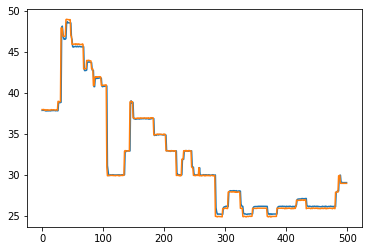

In [26]:
import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'][:500])
plt.plot(train_results['Actuals'][:500])

In [27]:
val_predictions = model1.predict(X_val).flatten()
val_results = pd.DataFrame(data={'Val Predictions': val_predictions,
                                 'Actuals':y_val})
val_results

16/16 [==============================] - 0s 2ms/step


,Val Predictions,Actuals
0,30.985817,30.56
1,30.621010,30.90
2,30.934601,30.56
3,30.615000,30.91
4,30.935534,30.56
...,...,...
495,37.336075,37.92
496,37.874653,37.90
497,37.820507,36.97
498,36.840633,36.92


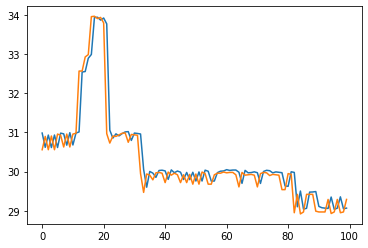

In [28]:
plt.plot(val_results['Val Predictions'][:100])
plt.plot(val_results['Actuals'][:100])

In [29]:
test_predictions = model1.predict(X_test).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions,
                                  'Actuals':y_test})
test_results

682/682 [==============================] - 1s 2ms/step


,Test Predictions,Actuals
0,36.709114,36.61
1,36.525383,36.97
2,36.904243,36.99
3,36.920712,38.97
4,38.912636,38.92
...,...,...
21790,26.195595,34.93
21791,34.827862,33.95
21792,33.924145,33.96
21793,33.666061,33.96


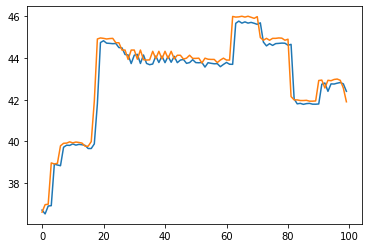

In [30]:
plt.plot(test_results['Test Predictions'][:100])
plt.plot(test_results['Actuals'][:100])

In [31]:
import sklearn
from sklearn.metrics import mean_absolute_error
mae_error = mean_absolute_error(y_test, test_predictions)
mae_error

0.3033580581514516

In [32]:
window_ds = []
outputs = []
first = np.squeeze(X_test[-1:], axis=0)
window_ds.append(first)
j = 0

while(j < 100):
  
  # Predict new data point based on past values
  window = window_ds[len(window_ds) - 1]
  window = window.reshape(1, 5, 1)
  yhat = model1.predict(window)

  # Prepares the next 5 data points
  window = np.copy(window_ds[len(window_ds) - 1])
  for i in range(0, len(window) - 1):
    window[i] = window[i + 1]
  window[len(window) - 1] = yhat

  # Add prediction to output list
  outputs.append(yhat[0])

  window_ds.append(window)
  print(j)
  j+=1

window_ds

1/1 [==============================] - 0s 28ms/step
0
1/1 [==============================] - 0s 14ms/step
1
1/1 [==============================] - 0s 14ms/step
2
1/1 [==============================] - 0s 15ms/step
3
1/1 [==============================] - 0s 15ms/step
4
1/1 [==============================] - 0s 21ms/step
5
1/1 [==============================] - 0s 15ms/step
6
1/1 [==============================] - 0s 17ms/step
7
1/1 [==============================] - 0s 16ms/step
8
1/1 [==============================] - 0s 17ms/step
9
1/1 [==============================] - 0s 16ms/step
10
1/1 [==============================] - 0s 16ms/step
11
1/1 [==============================] - 0s 16ms/step
12
1/1 [==============================] - 0s 14ms/step
13
1/1 [==============================] - 0s 16ms/step
14
1/1 [==============================] - 0s 14ms/step
15
1/1 [==============================] - 0s 14ms/step
16
1/1 [==============================] - 0s 14ms/step
17
1/1 [===============

[array([[25.97],
        [34.93],
        [33.95],
        [33.96],
        [33.96]]), array([[34.93      ],
        [33.95      ],
        [33.96      ],
        [33.96      ],
        [34.00603867]]), array([[33.95      ],
        [33.96      ],
        [33.96      ],
        [34.00603867],
        [33.96730042]]), array([[33.96      ],
        [33.96      ],
        [34.00603867],
        [33.96730042],
        [33.93984222]]), array([[33.96      ],
        [34.00603867],
        [33.96730042],
        [33.93984222],
        [33.91274643]]), array([[34.00603867],
        [33.96730042],
        [33.93984222],
        [33.91274643],
        [33.88747025]]), array([[33.96730042],
        [33.93984222],
        [33.91274643],
        [33.88747025],
        [33.86160278]]), array([[33.93984222],
        [33.91274643],
        [33.88747025],
        [33.86160278],
        [33.83630753]]), array([[33.91274643],
        [33.88747025],
        [33.86160278],
        [33.83630753],
        [3

In [33]:
outputs

[array([34.00604], dtype=float32),
 array([33.9673], dtype=float32),
 array([33.939842], dtype=float32),
 array([33.912746], dtype=float32),
 array([33.88747], dtype=float32),
 array([33.861603], dtype=float32),
 array([33.836308], dtype=float32),
 array([33.81147], dtype=float32),
 array([33.787113], dtype=float32),
 array([33.76319], dtype=float32),
 array([33.739708], dtype=float32),
 array([33.716656], dtype=float32),
 array([33.69403], dtype=float32),
 array([33.67182], dtype=float32),
 array([33.65003], dtype=float32),
 array([33.628635], dtype=float32),
 array([33.60764], dtype=float32),
 array([33.587036], dtype=float32),
 array([33.56682], dtype=float32),
 array([33.546974], dtype=float32),
 array([33.527504], dtype=float32),
 array([33.5084], dtype=float32),
 array([33.48965], dtype=float32),
 array([33.471252], dtype=float32),
 array([33.4532], dtype=float32),
 array([33.43549], dtype=float32),
 array([33.418106], dtype=float32),
 array([33.401054], dtype=float32),
 array([3

In [34]:
new_plot = np.arange(1, 301)
pred_plot = np.arange(301, 401)

In [35]:
df['Temp'][-100:].values

array([25.95, 25.91, 25.95, 25.95, 25.91, 24.92, 24.96, 24.97, 24.9 ,
       24.94, 24.9 , 24.9 , 24.96, 24.92, 24.96, 24.93, 24.91, 25.94,
       25.92, 24.94, 24.99, 24.93, 24.94, 25.97, 25.93, 25.91, 25.99,
       25.91, 25.97, 24.93, 24.9 , 24.94, 24.92, 24.94, 24.94, 25.94,
       25.91, 25.92, 25.96, 24.98, 24.91, 25.97, 25.94, 24.9 , 24.91,
       24.93, 24.96, 24.94, 24.96, 24.9 , 24.97, 24.98, 24.97, 24.96,
       24.96, 24.94, 24.93, 24.96, 24.96, 25.91, 25.92, 25.99, 25.99,
       24.94, 24.97, 25.94, 25.99, 25.99, 25.91, 25.97, 25.96, 25.97,
       25.96, 25.95, 25.96, 25.94, 25.95, 25.97, 25.98, 25.95, 25.99,
       25.94, 25.92, 25.9 , 25.95, 25.93, 25.96, 25.92, 25.98, 25.96,
       25.97, 25.93, 25.93, 25.99, 25.97, 34.93, 33.95, 33.96, 33.96,
       33.91])

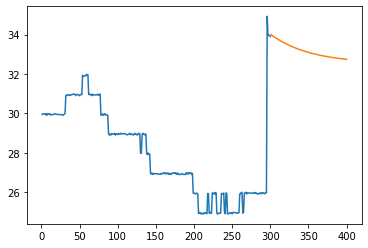

In [36]:
plt.plot(new_plot, df['Temp'][-300:].values)
plt.plot(pred_plot, outputs)